<a href="https://colab.research.google.com/github/sagneeksengupta/Chicago-Crimes-in-2022/blob/main/Crime_Prediction_in_Chicago_in_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
georgehanyfouad_crime_prediction_in_chicago_in_2022_path = kagglehub.dataset_download('georgehanyfouad/crime-prediction-in-chicago-in-2022')

print('Data source import complete.')


100%|██████████| 14.2M/14.2M [00:00<00:00, 49.6MB/s]

Extracting files...


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Libraries

In [3]:
!pip install xgboost
!pip install scikit-learn==1.0.2 # Downgrade scikit-learn to version 1.0.2
!pip install --upgrade xgboost # Install the latest version of xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import RandomizedSearchCV

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 27.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.29.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.0.2 which is incompatible.


In [4]:
df = pd.read_csv("/content/Crime Prediction in Chicago_Dataset.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    239558 non-null  int64         
 1   Case Number           239558 non-null  object        
 2   Date                  239558 non-null  datetime64[ns]
 3   Block                 239558 non-null  object        
 4   IUCR                  239558 non-null  object        
 5   Primary Type          239558 non-null  object        
 6   Description           239558 non-null  object        
 7   Location Description  238593 non-null  object        
 8   Arrest                239558 non-null  bool          
 9   Domestic              239558 non-null  bool          
 10  Beat                  239558 non-null  int64         
 11  District              239558 non-null  int64         
 12  Ward                  239548 non-null  float64       
 13 

In [7]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()

In [8]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour,DayOfWeek
0,12592454,JF113025,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)",1,14,15,Friday
1,12785595,JF346553,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)",8,5,21,Friday
2,12808281,JF373517,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)",8,14,14,Sunday
3,12888104,JF469015,2022-11-10 03:47:00,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)",11,10,3,Thursday
4,13209277,JG422539,2022-08-15 09:00:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN,8,15,9,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239553,27038,JF387886,2022-09-08 10:50:00,061XX N WINTHROP AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,...,1940929.0,2022,12/29/2022 15:40,41.993457,-87.658318,"(41.993457327, -87.658318065)",9,8,10,Thursday
239554,26819,JF275138,2022-06-10 23:41:00,018XX S CANAL ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1891309.0,2022,9/19/2022 15:41,41.857173,-87.638918,"(41.857173304, -87.638917814)",6,10,23,Friday
239555,26601,JF132803,2022-02-03 16:27:00,000XX E 100TH PL,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,1838358.0,2022,9/19/2022 15:41,41.711753,-87.621374,"(41.711753121, -87.621374343)",2,3,16,Thursday
239556,26857,JF290575,2022-06-23 02:25:00,027XX S KEDVALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1885416.0,2022,9/1/2022 15:42,41.841506,-87.728122,"(41.841506072, -87.728122297)",6,23,2,Thursday


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    239558 non-null  int64         
 1   Case Number           239558 non-null  object        
 2   Date                  239558 non-null  datetime64[ns]
 3   Block                 239558 non-null  object        
 4   IUCR                  239558 non-null  object        
 5   Primary Type          239558 non-null  object        
 6   Description           239558 non-null  object        
 7   Location Description  238593 non-null  object        
 8   Arrest                239558 non-null  bool          
 9   Domestic              239558 non-null  bool          
 10  Beat                  239558 non-null  int64         
 11  District              239558 non-null  int64         
 12  Ward                  239548 non-null  float64       
 13 

In [10]:
df['Arrest'] = df['Arrest'].astype(bool)
df['Domestic'] = df['Domestic'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    239558 non-null  int64         
 1   Case Number           239558 non-null  object        
 2   Date                  239558 non-null  datetime64[ns]
 3   Block                 239558 non-null  object        
 4   IUCR                  239558 non-null  object        
 5   Primary Type          239558 non-null  object        
 6   Description           239558 non-null  object        
 7   Location Description  238593 non-null  object        
 8   Arrest                239558 non-null  bool          
 9   Domestic              239558 non-null  bool          
 10  Beat                  239558 non-null  int64         
 11  District              239558 non-null  int64         
 12  Ward                  239548 non-null  float64       
 13 

In [11]:
df= df.drop_duplicates()
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour,DayOfWeek
0,12592454,JF113025,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)",1,14,15,Friday
1,12785595,JF346553,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)",8,5,21,Friday
2,12808281,JF373517,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)",8,14,14,Sunday
3,12888104,JF469015,2022-11-10 03:47:00,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)",11,10,3,Thursday
4,13209277,JG422539,2022-08-15 09:00:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN,8,15,9,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239553,27038,JF387886,2022-09-08 10:50:00,061XX N WINTHROP AVE,110,HOMICIDE,FIRST DEGREE MURDER,PORCH,True,False,...,1940929.0,2022,12/29/2022 15:40,41.993457,-87.658318,"(41.993457327, -87.658318065)",9,8,10,Thursday
239554,26819,JF275138,2022-06-10 23:41:00,018XX S CANAL ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1891309.0,2022,9/19/2022 15:41,41.857173,-87.638918,"(41.857173304, -87.638917814)",6,10,23,Friday
239555,26601,JF132803,2022-02-03 16:27:00,000XX E 100TH PL,110,HOMICIDE,FIRST DEGREE MURDER,AUTO,False,False,...,1838358.0,2022,9/19/2022 15:41,41.711753,-87.621374,"(41.711753121, -87.621374343)",2,3,16,Thursday
239556,26857,JF290575,2022-06-23 02:25:00,027XX S KEDVALE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,1885416.0,2022,9/1/2022 15:42,41.841506,-87.728122,"(41.841506072, -87.728122297)",6,23,2,Thursday


## Crime Type Distribution

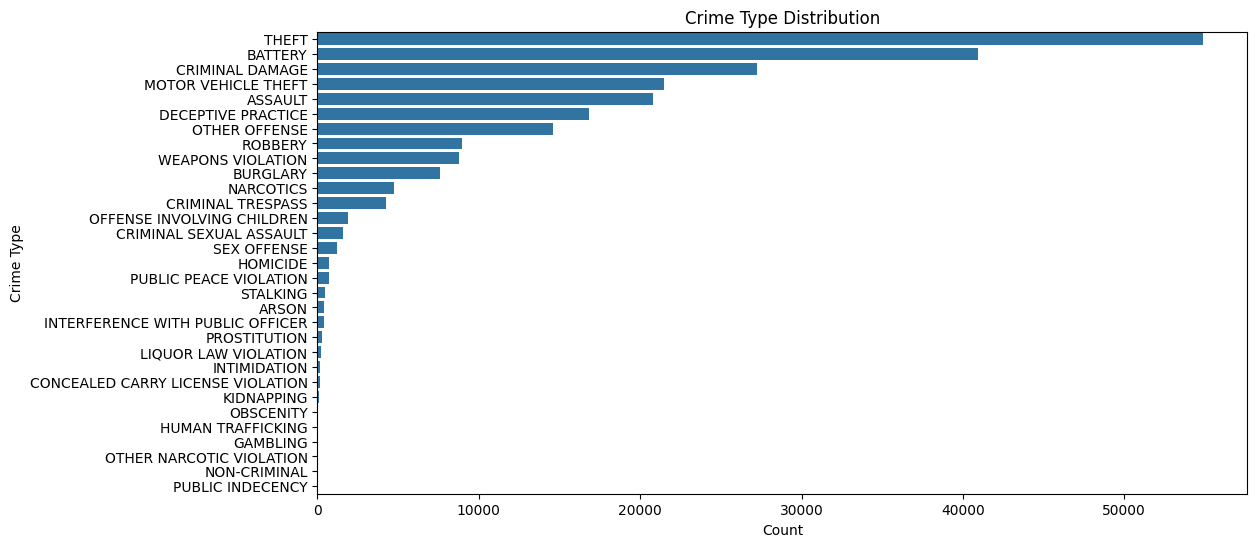

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Primary Type', order=df['Primary Type'].value_counts().index)
plt.title('Crime Type Distribution')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

#### From this graph we observe the distribution of different kinds of crimes that took place in 2022, with theft being the most common

## Graph for Crime Trend over Time

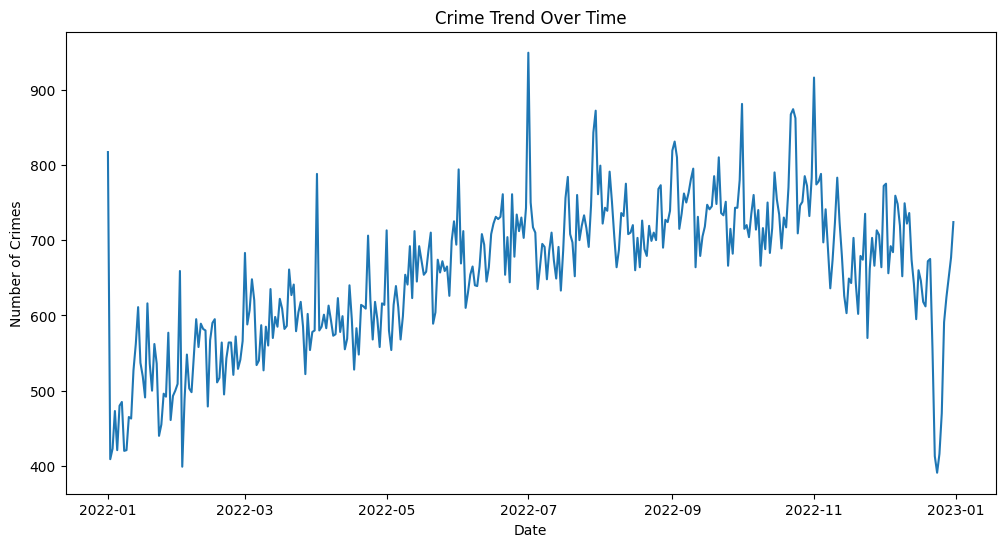

In [13]:
df['Date'].groupby(df['Date'].dt.date).count().plot(
    figsize=(12, 6), title='Crime Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

#### From this graph we observe around 07/2022 most number of crimes took place

## Arrest Rate by Crime Type

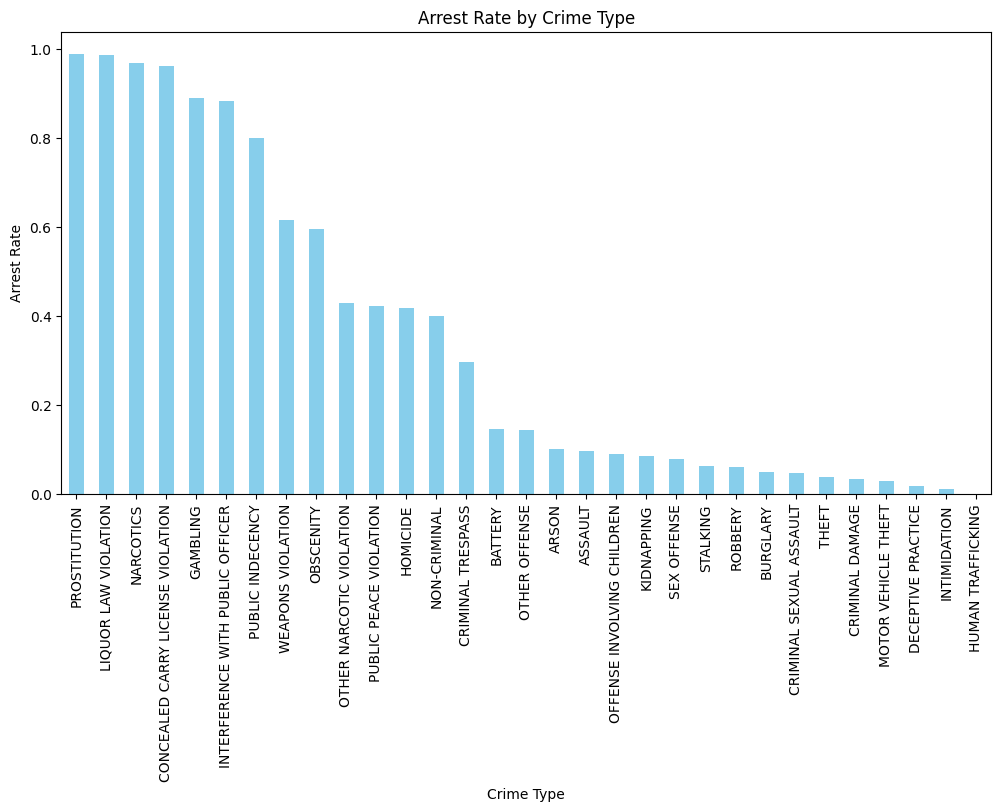

In [14]:
arrest_rate = df.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
arrest_rate.plot(kind='bar', color='skyblue')
plt.title('Arrest Rate by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')
plt.show()

#### We observe the arrest rate of each crime from this graph with Prostitution having highest while Human Trafficking has the lowest arrest rate

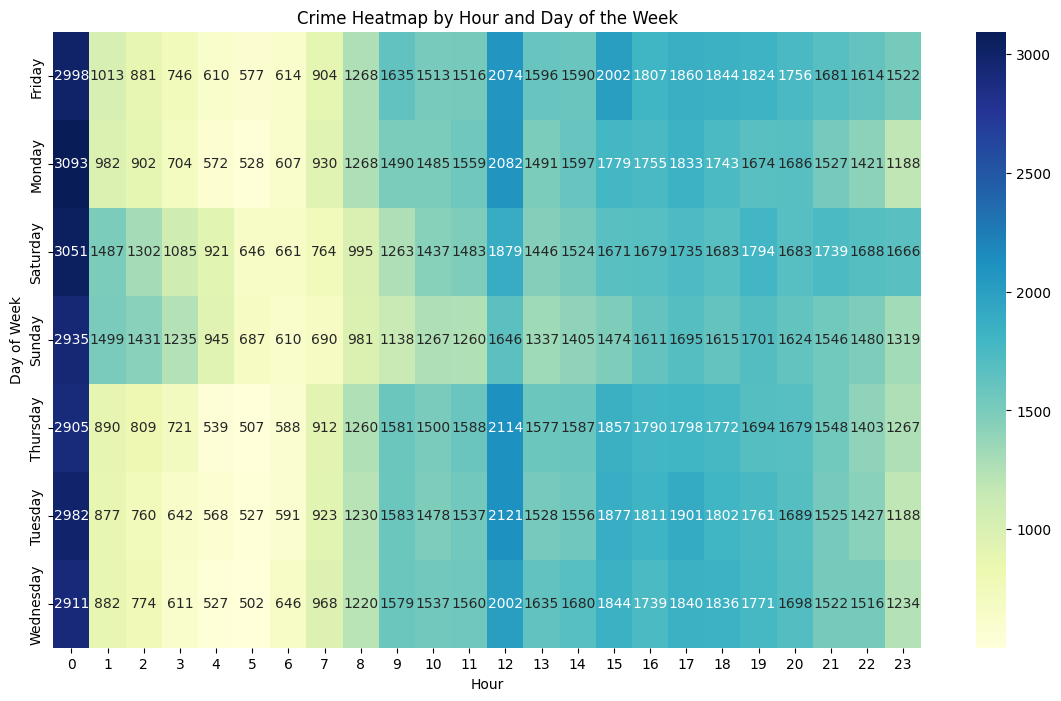

In [15]:
heatmap_data = pd.pivot_table(
    df, values='ID', index='DayOfWeek', columns='Hour', aggfunc='count', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d")
plt.title('Crime Heatmap by Hour and Day of the Week')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()

### Observations

1. **Peak Crime Hours** : Higher crime counts occur between 12 PM to 8 PM
2. **Weekly Trends** : Saturday and Sunday have higher crime counts compared to weekdays
3. **Friday Evening Spike** : A noticeable spike is observed on Friday evenings, indicating increased activity as the weekend begins.

## Pre Processing data

### Encoding categorical Values

In [16]:
df['Primary Type'] = df['Primary Type'].astype('category').cat.codes
df['DayOfWeek'] = df['DayOfWeek'].astype('category').cat.codes
df['Domestic'] = df['Domestic'].astype('category').cat.codes
df['Description'] = df['Description'].astype('category').cat.codes
df['Location Description'] = df['Location Description'].astype(
    'category').cat.codes
df['Arrest'] = df['Arrest'].astype('category').cat.codes

### Defining features and target

In [17]:
X = df[['Primary Type', 'Location Description', 'Domestic', 'Description']]
y = df['Arrest']

### Train-Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the XGBoost Model

### Initialize the model

In [19]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

### Hyperparameters

In [20]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

### Set up GridSearchCV

In [21]:
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_distributions=param_grid,
    scoring='accuracy',
    n_iter=20,  # Number of random combinations to try
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

### Fit GridSearchCV

In [22]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:22:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           monotone_constraints=None,
                         

### Get the best parameters

In [23]:
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.105, 'colsample_bytree': 0.8}


### Train the model with the best parameters

In [24]:
best_model = random_search.best_estimator_

### Make predictions

In [25]:
y_pred = best_model.predict(X_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9295166137919519
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     42269
           1       0.89      0.46      0.61      5643

    accuracy                           0.93     47912
   macro avg       0.91      0.73      0.78     47912
weighted avg       0.93      0.93      0.92     47912



In [27]:
best_model.save_model('/content/crime_pred_model.h5')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:22:50] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
